In [221]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


1.Wczytanie danych
2.Pokazanie niezbalansowania klas na wykrysie
3.Oversampling, czyli dodanie obserwacji, by wykluczyć to niezbalansowanie
4.GridSearch, klasyfikacja Random Forest
5.Przedstawienie wyników

In [222]:
df = pd.read_csv(r"creditcard.csv")

In [243]:
print(df.columns)
print(df.shape)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
(284807, 30)


In [224]:
#wziąc opis z kaggle, tam z tego datasetu co to jest

Is ther any Null value? False
Number of Fraud is 492 which is 0.17 % of total counts


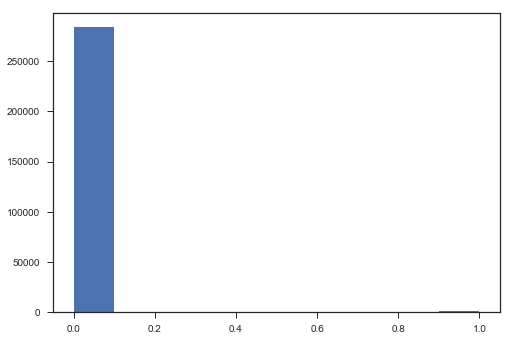

In [225]:
print('Is ther any Null value?',df.isnull().any().any())# How many NaNs?
print('Number of Fraud is',len(fraud_count),"which is",round(y.mean()*100,2),"% of total counts")


plt.hist(df['Class'])
plt.show()

In [226]:
y=df.pop('Class')
X=df

In [227]:
#1.Oversampling
#Based on https://beckernick.github.io/oversampling-modeling/

training_features, test_features,training_target, test_target, =  train_test_split(X, y,test_size = 0.1,random_state=12)
                                               
                                               
                                               

In [228]:
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = 0.1,
                                                  random_state=12)



In [229]:
#SMOTE ALGORITHM
sm = SMOTE(random_state=12)#, ratio = 1.0
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)


In [232]:

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV

In [239]:
#Classification

pipe = Pipeline([
    ('RandomForest',RandomForestClassifier(n_jobs=-1))])
    
param_grid = {'RandomForest__n_estimators':[10,25,35],
              "RandomForest__max_depth":[5,7,10,14],
                "RandomForest__min_samples_leaf":[5,10]
               
               
             }

clf_rf = GridSearchCV(pipe,param_grid)


clf_rf.fit(x_train_res,y_train_res)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('RandomForest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'RandomForest__n_estimators': [10, 25, 35], 'RandomForest__max_depth': [5, 7, 10, 14], 'RandomForest__min_samples_leaf': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [240]:
print(clf_rf.best_estimator_)

Pipeline(memory=None,
     steps=[('RandomForest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])


source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [241]:


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the training dataset:  0.877551020408
Recall metric in the testing dataset:  0.844444444444
Confusion matrix, without normalization
[[28423    13]
 [    7    38]]


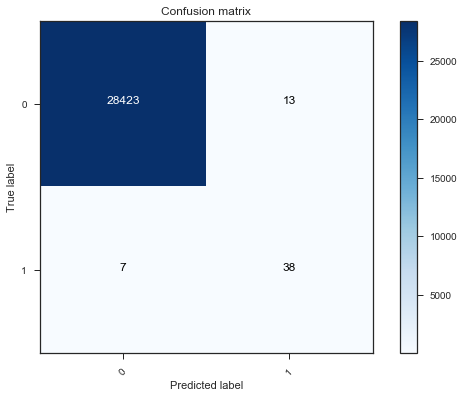

In [242]:
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix = confusion_matrix(test_target,clf_rf.best_estimator_.predict(test_features))
#

print("Recall metric in the training dataset: ",recall_score(y_val, clf_rf.best_estimator_.predict(x_val)))
print ("Recall metric in the testing dataset: ",recall_score(test_target, clf_rf.best_estimator_.predict(test_features)))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()